# **Instalacion de librerias**

In [1]:
!pip install dask[dataframe]
!pip install lifelines==0.26.0
!pip install biopython
!pip install padelpy
!pip install padel-pywrapper
!pip install rdkit
!pip install mol2vec
!pip install rdkit-pypi
!pip install propy3
!pip install PyBioMed
!pip install PyProtein
!pip install bayesian-optimization
!pip install scikit-optimize
!pip install openpyxl
!pip install hyperopt
!pip install statsmodels
!pip install --upgrade slickml
!pip install xgboost==2.1.1
!pip install lightgbm

  Using cached PyBioMed-1.0-py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.3 MB/s eta 0:00:0

In [2]:
# librerias para leer datos y archivos
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, make_scorer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import boxcox
from scipy import stats
import joblib
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import re
from slickml.metrics import RegressionMetrics

# Etapa 4 del desarrollo: Preprocesamiento y Normalización.

In [5]:
dataset = pd.read_excel("datasets/dataset_cov_obps_4.xlsx") # importación de dataset

In [6]:
dataset

,Compound name,protein_name,Smiles,AA Sequence W/O signal peptide,affinity,nAcid,ALogP,ALogp2,AMR,apol,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MEVEMLPEGMKQLTGGFIKVFEACKTELGLKDGMLTDMYHLWREEY...,7.13,0,1.5768,2.486298,60.6615,37.017860,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MMKDMTKNFLKAYGECQQELHLTDDTARDLMFFWKEDYEVTSREAG...,10.06,0,1.5768,2.486298,60.6615,37.017860,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,CC(=O)/C=C/C1=C(C)CCCC1(C)C,SQEVMKKMSATFFKLLEECKKELSVTDDMIQGLVRFWLEDSALGER...,9.85,0,1.5768,2.486298,60.6615,37.017860,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,CC(=O)/C=C/C1=C(C)CCCC1(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,12.93,0,1.5768,2.486298,60.6615,37.017860,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,1.5768,2.486298,60.6615,37.017860,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,CCC(O)C(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,30.00,0,-0.1745,0.030450,29.0406,20.697102,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,CCC(O)C(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,9.57,0,-0.1745,0.030450,29.0406,20.697102,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,COCc1ccccc1,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,24.11,0,-0.0402,0.001616,12.0280,21.549930,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,COCc1ccccc1,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,-0.0402,0.001616,12.0280,21.549930,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


separación de descriptores con la afinidad y eliminación de columnas con cero en su totalidad

In [7]:
#dataset = merge_df.copy()
descriptors_matrix = dataset.iloc[:, 5:] # corte de caracteristicas (nombres, smiles, secuencias, etc.)
descriptors_matrix = descriptors_matrix.fillna(0) # transformar los NaN a 0
descriptors_matrix = descriptors_matrix.loc[:, (descriptors_matrix != 0).any(axis=0)] # Eliminación de columnas con 0 en su totalidad

affinity_data = dataset['affinity'] # Columna de Afinidad
descriptors_matrix.shape, affinity_data.shape

((1459, 3047), (1459,))

## División del conjunto de datos con un Split de 80x20

In [8]:
X = descriptors_matrix.values
y = affinity_data.values
X.shape, y.shape

((1459, 3047), (1459,))

In [9]:
from sklearn.model_selection import train_test_split

seed = 41  # Semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1167, 3047), (292, 3047), (1167,), (292,))

## Normalización de StandardScaler y MinMaxScaler a descriptores

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train, columns=descriptors_matrix.columns)


X_test = scaler.fit_transform(X_test)
X_test_df = pd.DataFrame(X_test, columns=descriptors_matrix.columns)

X_train.shape, X_test.shape,

((1167, 3047), (292, 3047))

In [11]:
X_train_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,...,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03
mean,2.968206e-17,-2.892098e-16,1.235230e-15,-4.407405e-15,8.129839e-15,-1.065510e-17,-3.120421e-17,-2.443061e-16,-1.316666e-16,9.132940e-17,...,-2.091595e-14,-1.120307e-13,-6.596114e-14,-5.637155e-14,-3.694579e-14,1.176627e-14,4.154118e-14,-5.277469e-14,-3.374012e-14,-2.460110e-14
std,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,...,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00
min,-2.048519e-01,-2.316739e+00,-8.444239e-01,-2.510409e+00,-2.190327e+00,-3.799725e-01,-3.780846e-01,-2.012967e+00,-2.384991e+00,-1.875078e+00,...,-2.595807e+00,-2.614142e+00,-2.114229e+00,-2.309836e+00,-2.276685e+00,-2.612368e+00,-3.624281e+00,-2.082442e+00,-2.518474e+00,-2.736481e+00
25%,-2.048519e-01,-6.549147e-01,-7.370233e-01,-7.067341e-01,-8.463540e-01,-3.799725e-01,-3.780846e-01,-8.352994e-01,-7.405792e-01,-8.514842e-01,...,-8.570491e-01,-5.789000e-01,-6.872688e-01,-7.676312e-01,-7.538465e-01,-6.599026e-01,-9.363867e-01,-6.685714e-01,-6.079417e-01,-8.173452e-01
50%,-2.048519e-01,-1.216018e-01,-3.253191e-01,7.939465e-02,1.494976e-02,-3.799725e-01,-3.780846e-01,-5.018793e-02,-3.583123e-02,-1.690884e-01,...,1.847567e-01,7.642414e-02,-7.771313e-02,-1.380984e-02,-1.883712e-01,-3.090886e-02,6.970851e-02,-1.224984e-01,-1.443307e-02,-2.258688e-01
75%,-2.048519e-01,5.491385e-01,2.153631e-01,8.096571e-01,9.802883e-01,-3.799725e-01,-3.780846e-01,9.704569e-01,9.038327e-01,9.682380e-01,...,7.621693e-01,6.333129e-01,9.242232e-01,7.745733e-01,7.696492e-01,6.963113e-01,7.177021e-01,6.985205e-01,7.222713e-01,7.087904e-01
max,4.881576e+00,2.415757e+00,4.414876e+00,2.329456e+00,2.332466e+00,5.335533e+00,5.260570e+00,2.383658e+00,3.487909e+00,2.560495e+00,...,2.645824e+00,2.769724e+00,1.690331e+00,2.133694e+00,3.925133e+00,1.995657e+00,2.012623e+00,3.449889e+00,3.166961e+00,2.189854e+00


In [12]:
X_test_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,...,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02
mean,-1.825024e-17,1.216683e-17,-2.068361e-16,-4.319224e-16,-1.776357e-15,2.889622e-17,-5.627158e-17,-2.190029e-16,-9.125121e-17,1.642522e-16,...,-5.961746e-16,2.217100e-14,2.648566e-14,2.423024e-14,1.819853e-14,-6.205082e-15,-2.134670e-14,9.891631e-15,2.640202e-15,-3.850801e-15
std,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,...,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00
min,-2.244097e-01,-1.906352e+00,-8.578534e-01,-2.425731e+00,-1.748799e+00,-3.729299e-01,-3.711202e-01,-1.703757e+00,-1.649529e+00,-1.778643e+00,...,-2.603172e+00,-2.601847e+00,-2.175366e+00,-2.310850e+00,-2.372443e+00,-2.459542e+00,-3.528193e+00,-2.298922e+00,-2.417792e+00,-1.596649e+00
25%,-2.244097e-01,-6.132577e-01,-7.451100e-01,-8.303226e-01,-8.664596e-01,-3.729299e-01,-3.711202e-01,-8.484166e-01,-7.372894e-01,-8.710610e-01,...,-8.144000e-01,-5.744286e-01,-7.439401e-01,-7.275628e-01,-7.808623e-01,-7.213594e-01,-8.788680e-01,-6.693012e-01,-7.221698e-01,-8.676849e-01
50%,-2.244097e-01,-1.387415e-01,-3.237251e-01,5.177830e-02,2.826846e-02,-3.729299e-01,-3.711202e-01,-7.083453e-02,-5.310983e-02,3.652084e-02,...,1.694247e-01,4.201009e-02,-1.238567e-01,1.520669e-03,-1.630596e-01,-5.827164e-02,3.452932e-02,-1.080799e-01,1.379153e-01,-2.733240e-01
75%,-2.244097e-01,4.104522e-01,1.904356e-01,7.885281e-01,1.011687e+00,-3.729299e-01,-3.711202e-01,1.017780e+00,8.591296e-01,9.441027e-01,...,7.456439e-01,6.459908e-01,8.958583e-01,6.892110e-01,7.687985e-01,7.750114e-01,6.503766e-01,7.711667e-01,6.327369e-01,6.745723e-01
max,4.456135e+00,2.582751e+00,3.029261e+00,2.259892e+00,2.068997e+00,5.187693e+00,5.115822e+00,2.106395e+00,3.367788e+00,2.078580e+00,...,2.236776e+00,2.849205e+00,1.657205e+00,2.164312e+00,4.109331e+00,2.046421e+00,2.027826e+00,3.723814e+00,3.069114e+00,2.193315e+00


## Transformación logaritmica de la columna affinity
---
Funcion de Tranformación de pKi

$$ \text{pKi} = -\log_{10} \left( \frac{K_i}{10^9} \right) $$

---
Funcion de Tranformación de pKi a Ki

$$ Ki = 10^{9 - \text{pKi}} $$

In [13]:
y_train = np.array([-np.log10(ki / 1e9) for ki in y_train])
y_train_df = pd.DataFrame(y_train, columns=['Affinity Train'])

y_test = np.array([-np.log10(ki / 1e9) for ki in y_test])
y_test_df = pd.DataFrame(y_test, columns=['Affinity Test'])

y_train.shape, y_test.shape

((1167,), (292,))

In [14]:
y_train_df.describe()

,Affinity Train
count,1167.000000
mean,8.061238
std,0.570015
min,6.326463
25%,7.696696
50%,7.974694
75%,8.397940
max,9.769551


In [15]:
y_test_df.describe()

,Affinity Test
count,292.000000
mean,8.088108
std,0.562954
min,6.851120
25%,7.698970
50%,8.000000
75%,8.423733
max,9.795880


# Etapa 6 del desarrollo: Evaluación con el 20% de prueba.

### Mejores parametros

In [16]:
# Mejores parámetros para XGBRegressor con cross validate r2 0.6915988130974144 con StandardScaler time:  30662.04586315155
best_params_xgb = {'colsample_bytree': 0.3922325871610119,
                    'gamma': 0.002323474481727709,
                    'learning_rate': 0.018861078560684884,
                    'max_depth': 10.0,
                    'min_child_weight': 9.0,
                    'n_estimators': 800.0,
                    'reg_alpha': 0.6838233259808031,
                    'reg_lambda': 1.7112872487243473,
                    'subsample': 0.5642637121473713}


# Mejores parámetros para LightGBM con cross validate r2 0.6850026533029647 con StandardScaler time:  2607.562037706375
#--------------------------------------------------------------------------------------------
best_params_lgbm = {'colsample_bytree': 0.3054143507546353,
                    'learning_rate': 0.022287768538525307,
                    'max_depth': 13.0,
                    'min_child_weight': 7.86230852334349,
                    'n_estimators': 900.0,
                    'num_leaves': 148.0,
                    'reg_alpha': 0.31671355690833075,
                    'reg_lambda': 1.5798876122828318,
                    'subsample': 0.6611237191551541}

# Mejores parámetros para Gradient Boosting con cross validate r2 0.6916697613806122 con StandardScaler time:  52311.27810359001
#--------------------------------------------------------------------------------------------
best_params_gb = {'learning_rate': 0.026551619705725157,
                    'max_depth': 5.0,
                    'max_features': 0.2603790702929217,
                    'min_samples_leaf': 1.0,
                    'min_samples_split': 10.0,
                    'n_estimators': 400.0,
                    'subsample': 0.687177648045593}

# Mejores parámetros para AdaBoost con cross validate r2 0.5147304052577645 con StandardScaler time:  57284.05629682541
#--------------------------------------------------------------------------------------------
best_params_ad =  {'learning_rate': 0.009965267088517431,
                    'n_estimators': 100.0}

# Mejores parámetros para Random Forest con cross validate r2 0.652422357958661 con StandardScaler time:  27565.863903045654
#--------------------------------------------------------------------------------------------
best_params_rf = {'max_depth': 16.0,
                    'min_samples_leaf': 1.0,
                    'min_samples_split': 5.0,
                    'n_estimators': 1000.0}

# Mejores parámetros para SVR con cross validate r2 0.5317146982007693 con StandardScaler time:  1333.0465042591095
#--------------------------------------------------------------------------------------------
best_params_svr = {'C': 1000.0,
                    'degree': 13.0,
                    'epsilon': 0.02972725436868376}

In [17]:
# Mejores parámetros para XGBRegressor
best_params_xgb = {
    'n_estimators': int(best_params_xgb['n_estimators']),
    'learning_rate': best_params_xgb['learning_rate'],
    'max_depth': int(best_params_xgb['max_depth']),
    'min_child_weight': int(best_params_xgb['min_child_weight']),
    'subsample': best_params_xgb['subsample'],
    'colsample_bytree': best_params_xgb['colsample_bytree'],
    'gamma': best_params_xgb['gamma'],
    'reg_alpha': best_params_xgb['reg_alpha'],
    'reg_lambda': best_params_xgb['reg_lambda']
}


# Mejores parámetros para LightGBM
best_params_lgbm = {
    'n_estimators': int(best_params_lgbm['n_estimators']),
    'learning_rate': best_params_lgbm['learning_rate'],
    'max_depth': int(best_params_lgbm['max_depth']),
    'min_child_weight': int(best_params_lgbm['min_child_weight']),
    'num_leaves': int(best_params_lgbm['num_leaves']),
    'colsample_bytree': best_params_lgbm['colsample_bytree'],
    'subsample': best_params_lgbm['subsample'],
    'reg_alpha': best_params_lgbm['reg_alpha'],
    'reg_lambda': best_params_lgbm['reg_lambda']
}


# Mejores parámetros para Gradient Boosting
best_params_gb = {
    'n_estimators': int(best_params_gb['n_estimators']),
    'learning_rate': best_params_gb['learning_rate'],
    'max_depth': int(best_params_gb['max_depth']),
    'min_samples_leaf': int(best_params_gb['min_samples_leaf']),
    'min_samples_split': int(best_params_gb['min_samples_split']),
    'subsample': best_params_gb['subsample'],
    'max_features': best_params_gb['max_features']
}

# Mejores parámetros para AdaBoost
best_params_ad = {
    'n_estimators': int(best_params_ad['n_estimators']),
    'learning_rate': best_params_ad['learning_rate']
}
# Mejores parámetros para RandomForest
best_params_rf = {
    'n_estimators': int(best_params_rf['n_estimators']),
    'max_depth': int(best_params_rf['max_depth']),
    'min_samples_leaf': int(best_params_rf['min_samples_leaf']),
    'min_samples_split': int(best_params_rf['min_samples_split'])
}
# Mejores parámetros para SVR
best_params_svr = {
    'C': int(best_params_svr['C']),
    'degree': int(best_params_svr['degree']),
    'epsilon': best_params_svr['epsilon']
}

## Modelos con mejores parametros

In [18]:
models = [
    ('XGBRegressor', XGBRegressor(**best_params_xgb,
                                    booster='gbtree',
                                    objective='reg:squarederror',
                                    eval_metric='rmse',
                                    tree_method='hist',
                                    n_jobs=-1,
                                    random_state=seed)),

    ('LightGBM', LGBMRegressor(**best_params_lgbm,
                                boosting_type='gbdt',
                                objective='regression',
                                metric='rmse',
                                n_jobs=-1,
                                verbosity=-1,
                                random_state=seed)),

    ('Gradient Boosting',  GradientBoostingRegressor(**best_params_gb,
                                                        loss='squared_error',
                                                        random_state=seed)),

    ('AdaBoost Regressor', AdaBoostRegressor(**best_params_ad,
                                                loss='square',
                                                random_state=seed)),

    ('Random Forest', RandomForestRegressor(**best_params_rf,
                                            criterion="squared_error",
                                            n_jobs=-1,
                                            random_state=seed)),

    ('Support Vector Regressor', SVR(**best_params_svr,
                                        kernel='rbf',
                                        gamma='scale'))
]

## Entrenamiento

In [19]:
# @title Codigo con StandardScaler 0 a 1 y log pki
# entrenamiento de modelos optimizados con split 80% y testeo con 20% prueba de dataset 1459x3048 y random_state de 41

result_models_train = []
result_models_test = []

time_models = []
y_predict_train = []
y_predict_test = []

for name, model in models:
    print(f"\t Entrenando a {name}...")
    start_time = time.time()

    #model.fit(X, y)
    model.fit(X_train, y_train)

    end_time = time.time()
    total_time = end_time - start_time
    time_models.append(total_time)

    y_pred = model.predict(X_train)

    y_predict_train.append(y_pred)

    print("time: ", total_time)

    # RMSE
    # rmse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))


    # MAE
    mae = mean_absolute_error(y_train, y_pred)

    # R²
    r2 = r2_score(y_train, y_pred)

    print("\n\t Train: ")
    print(f"\nRMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

    result_models_train.append({
        'model': name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae,
        'time': total_time,
    })
    print("--------------------------------------------------------------------------------------")
    print("\n")

    y_pred = model.predict(X_test)

    y_predict_test.append(y_pred)

    # RMSE
    # rmse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    # MAE
    mae = mean_absolute_error(y_test, y_pred)

    # R²
    r2 = r2_score(y_test, y_pred)

    print("\t Test: ")
    print(f"\nRMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

    result_models_test.append({
        'model': name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae,
        'time': total_time,
    })
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")
    joblib.dump(model, f'Trained models/training - {name.lower().replace(" ", "_")}.pkl')


result_models_train_df = pd.DataFrame(result_models_train)
result_models_test_df = pd.DataFrame(result_models_test)

	 Entrenando a XGBRegressor...
time:  60.07685875892639

	 Train: 

RMSE: 0.07460529913519648
MAE: 0.049446857520648084
R²: 0.9828549656049451
--------------------------------------------------------------------------------------


	 Test: 

RMSE: 0.276439626548203
MAE: 0.20222863041589823
R²: 0.7580394240100851
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	 Entrenando a LightGBM...
time:  10.877724885940552

	 Train: 

RMSE: 0.04811738574847837
MAE: 0.0281619139365399
R²: 0.9928681359456702
--------------------------------------------------------------------------------------


	 Test: 

RMSE: 0.28387533390506275
MAE: 0.20766969600588933
R²: 0.7448477921792493
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
# con StandardScaler y log pki con random state de 41
result_models_train_df

,model,RMSE,R²,MAE,time
0,XGBRegressor,0.074605,0.982855,0.049447,60.076859
1,LightGBM,0.048117,0.992868,0.028162,10.877725
2,Gradient Boosting,0.111123,0.961963,0.084149,48.076424
3,AdaBoost Regressor,0.355508,0.610689,0.274667,35.211591
4,Random Forest,0.142889,0.937108,0.095802,238.413900
5,Support Vector Regressor,0.037454,0.995679,0.030224,2.089315


In [21]:
# con StandardScaler y log pki con random state de 41
result_models_test_df

,model,RMSE,R²,MAE,time
0,XGBRegressor,0.276440,0.758039,0.202229,60.076859
1,LightGBM,0.283875,0.744848,0.207670,10.877725
2,Gradient Boosting,0.290489,0.732820,0.215564,48.076424
3,AdaBoost Regressor,0.379774,0.543338,0.291751,35.211591
4,Random Forest,0.299880,0.715266,0.221596,238.413900
5,Support Vector Regressor,0.329415,0.656417,0.235996,2.089315


## Graficos de Comparación de resultados de entrenamiento con 20% de prueba y modelos optimizados

### Barra de Comparación de metricas

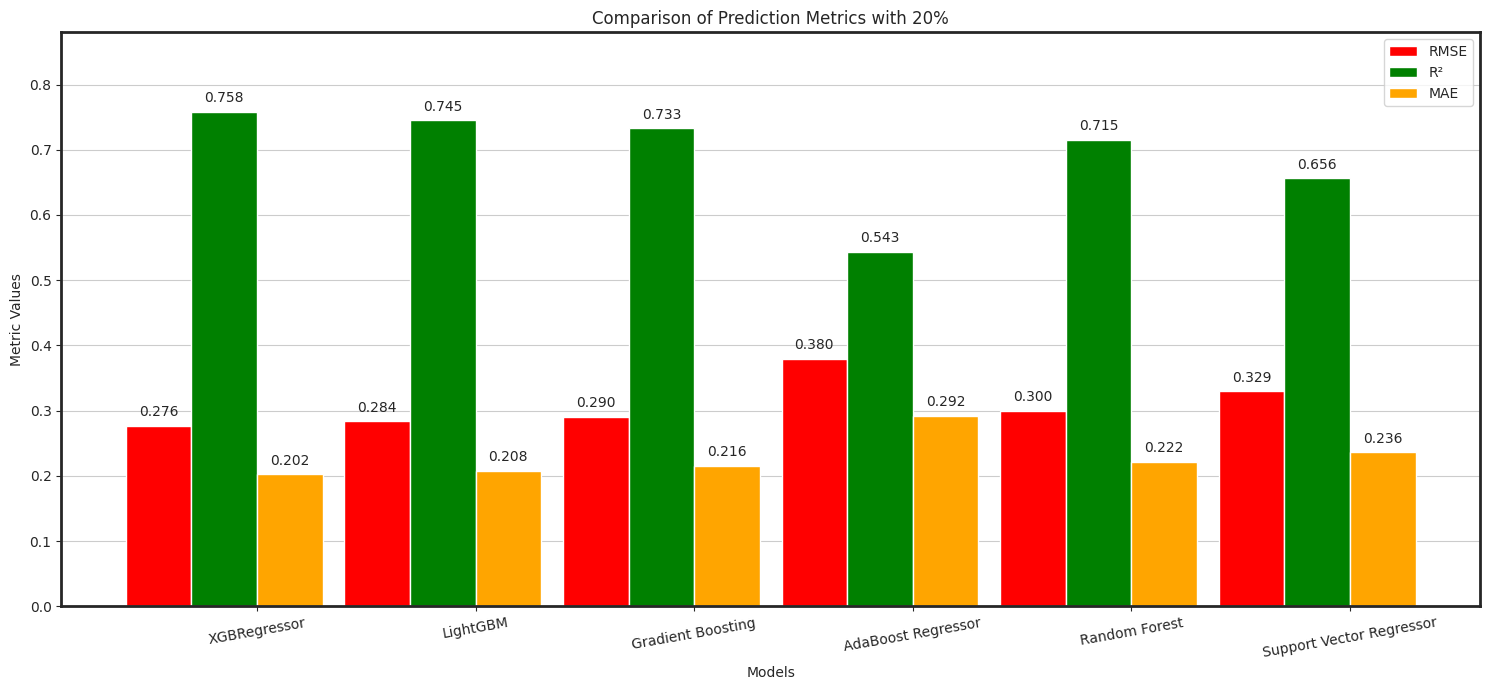

In [22]:
# Ancho de las barras
bar_width = 0.3
models = ['XGBRegressor', 'LightGBM', 'Gradient Boosting', 'AdaBoost Regressor', 'Random Forest', 'Support Vector Regressor']

index = np.arange(len(models))

# Crear la figura y los ejes
plt.figure(figsize=(15, 7))

# Gráficos de barras con anotaciones
plt.bar(index - bar_width*1.5, result_models_test_df['RMSE'], bar_width, label='RMSE', color='red')
for i, valor in enumerate(result_models_test_df['RMSE']):
    plt.text(i - bar_width*1.5, valor + 0.01, f"{valor:.3f}", ha='center', va='bottom')

plt.bar(index - bar_width/2, result_models_test_df['R²'], bar_width, label='R²', color='green')
for i, valor in enumerate(result_models_test_df['R²']):
    plt.text(i - bar_width/2, valor + 0.01, f"{valor:.3f}", ha='center', va='bottom')

plt.bar(index + bar_width/2, result_models_test_df['MAE'], bar_width, label='MAE', color='orange')
for i, valor in enumerate(result_models_test_df['MAE']):
    plt.text(i + bar_width/2, valor + 0.01, f"{valor:.3f}", ha='center', va='bottom')

# Etiquetas y títulos
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Comparison of Prediction Metrics with 20%')
plt.xticks(index, models, rotation=10)
#plt.yticks(np.arange(0, result_models_df2['R²'].max() + 0.1, 0.05))
plt.ylim(0, 0.88)
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.grid(axis='y')

plt.savefig("Plots figures/Metricas de Entrenamiento con barras.jpg", bbox_inches='tight')

# Mostrar el gráfico
plt.show()

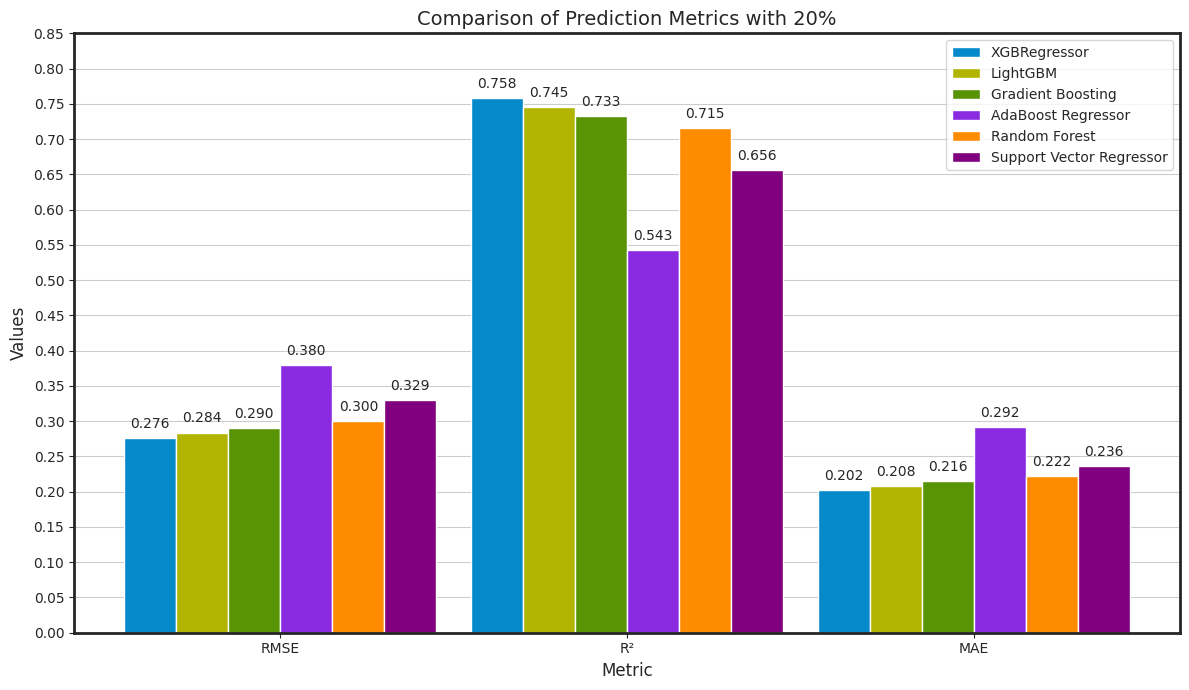

In [23]:
# Configurar el gráfico

colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

#models_test_df = result_models_test_df.iloc[:,:-3]
models_test_df = result_models_test_df[['model', 'RMSE', 'R²',	'MAE']]

models = models_test_df['model']
metrics = models_test_df.columns[1:]
values = models_test_df.iloc[:, 1:].values

errors = np.random.uniform(0.001, 0.01, values.shape)  # Simular errores para las barras


# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
x = np.arange(len(metrics))

# Graficar barras para cada modelo
for i, model in enumerate(models):
    #bars = ax.bar(x + i * bar_width, values[i], bar_width, yerr=errors[i], capsize=3,  color=colors[i], label=model)
    bars = ax.bar(x + i * bar_width, values[i], bar_width, color=colors[i], label=model)

    # Añadir valores encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Configurar etiquetas y título
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Comparison of Prediction Metrics with 20%', fontsize=14)
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(metrics, fontsize=10)
ax.set_yticks(np.arange(0, models_test_df['R²'].max() + 0.1, 0.05))
ax.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Entrenamiento con barras 3.jpg", bbox_inches='tight')

plt.show()

### Comparación de Predicciones de entrenamiento con train

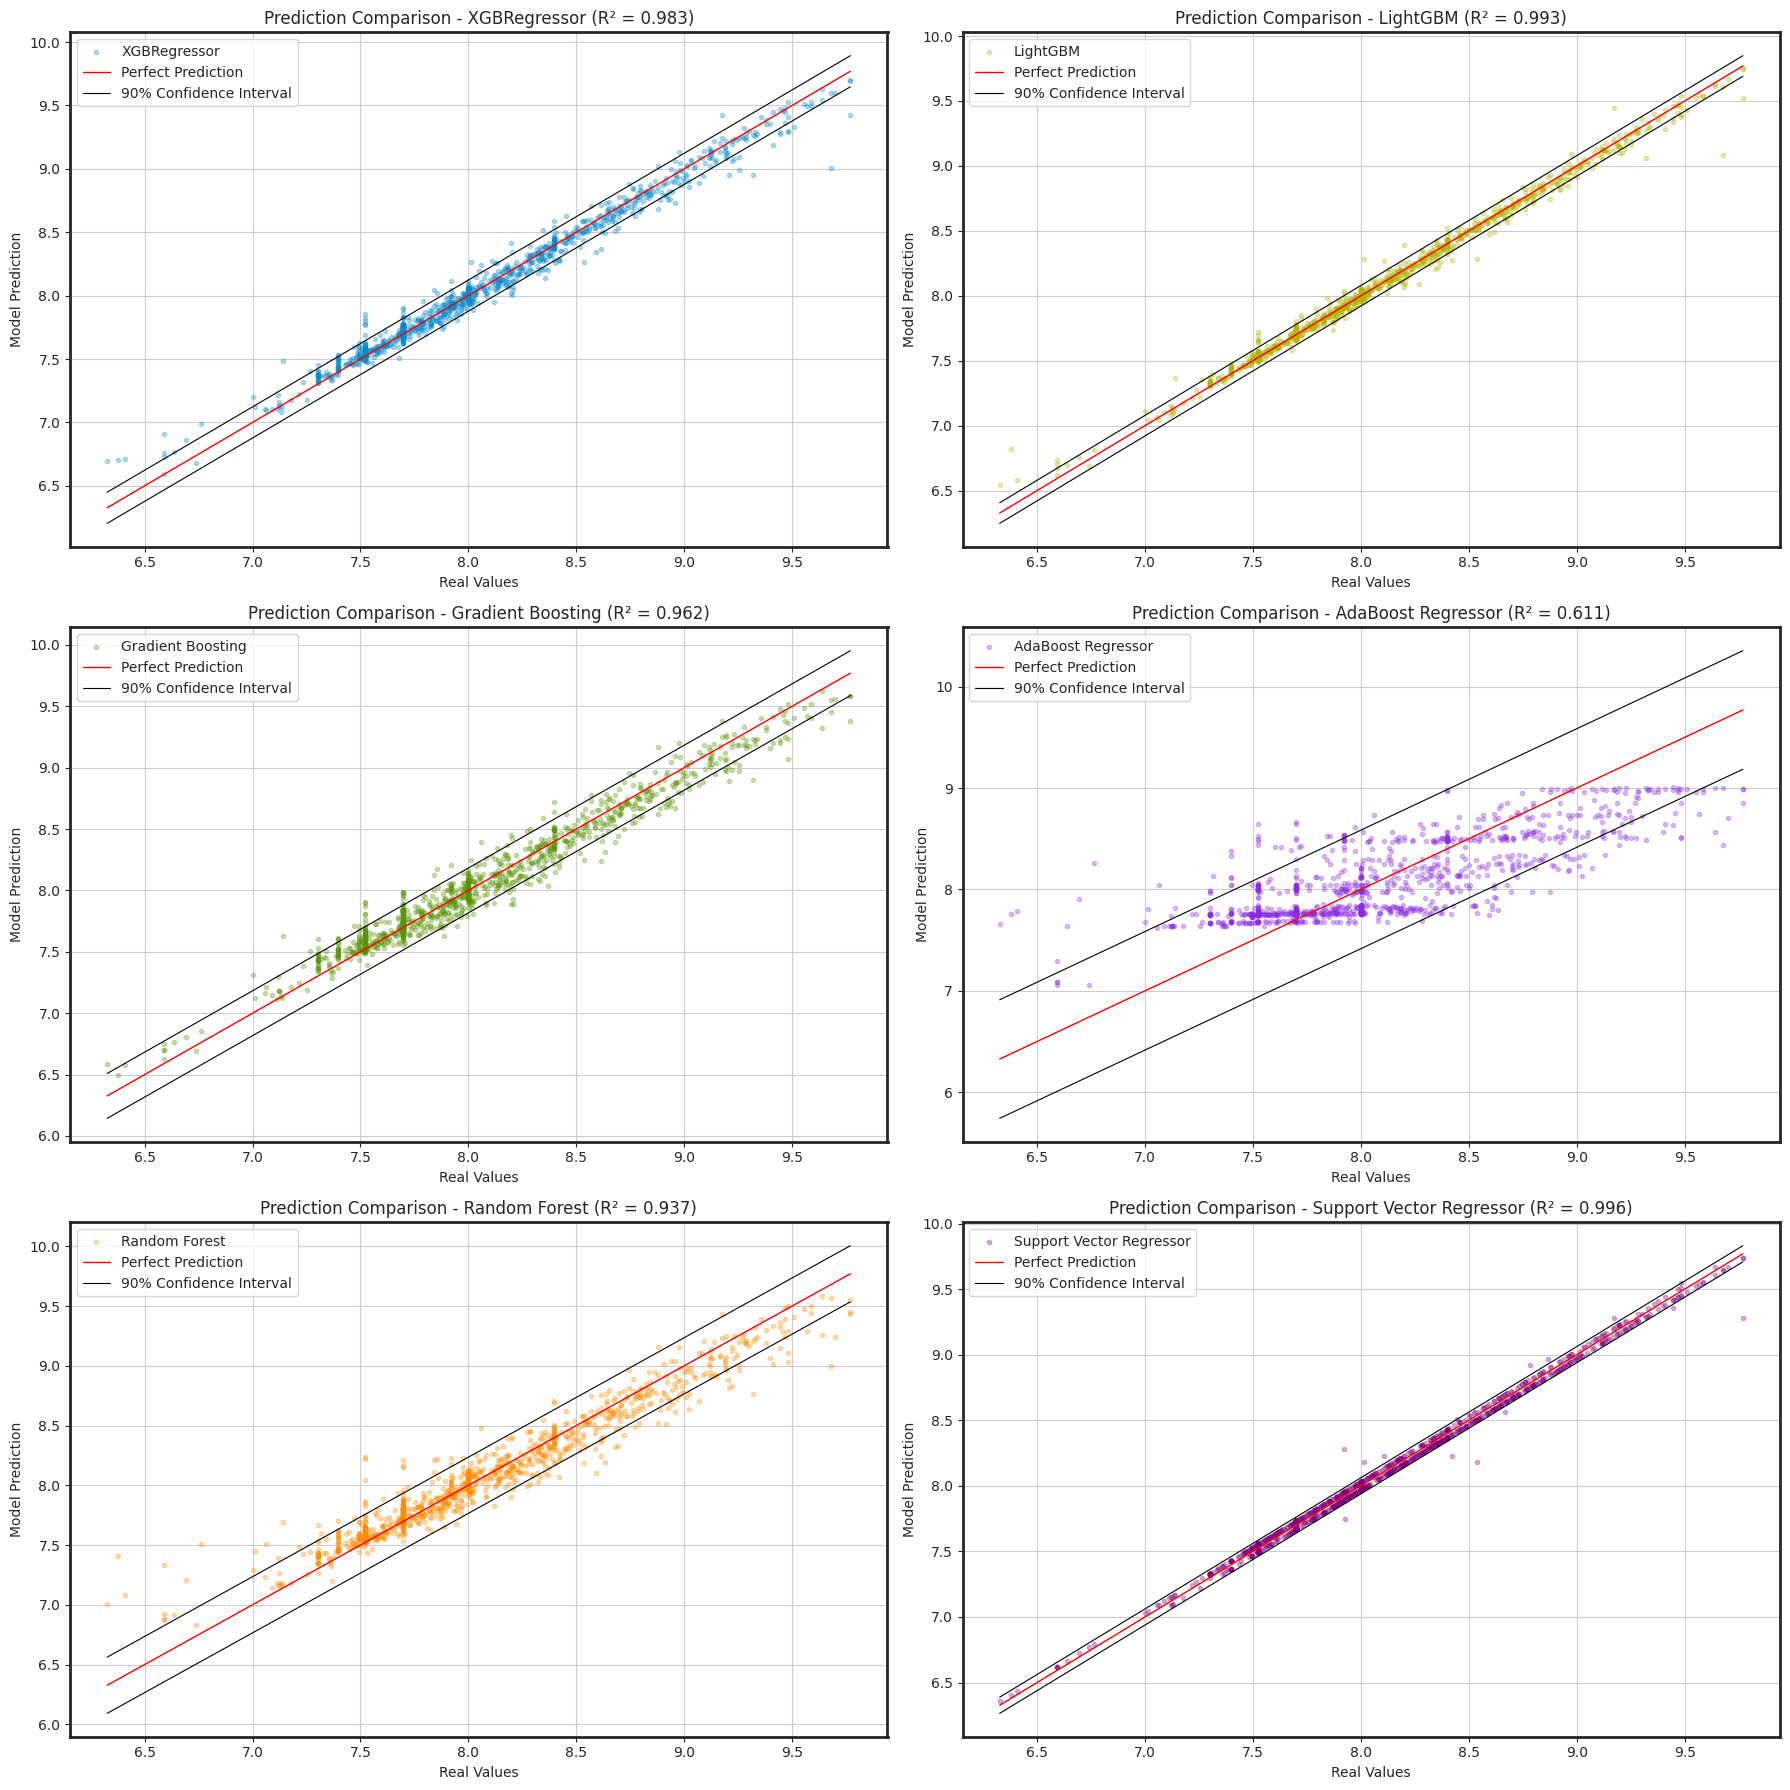

In [26]:
# @title Grafico de Comparacion de Predicciones de entrenamiento con train
colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

# Configura el gráfico
plt.figure(figsize=(18, 18))

for i, row in result_models_train_df.iterrows():
    # Calcula residuos y desviación estándar para el modelo actual
    residuals = y_train - y_predict_train[i]
    std_residuals = np.std(residuals)

    # Define z-score para intervalo de confianza del 90%
    z = stats.norm.ppf(0.95)
    ci_offset = z * std_residuals

    # Dibuja el scatter plot y la línea de predicción perfecta
    plt.subplot(3, 2, i + 1)  # Ajusta el diseño de subgráficos según sea necesario
    plt.scatter(y_train, y_predict_train[i], color=colors[i], label=row['model'], alpha=0.3, s=10, marker="8")
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='r', lw=1, label='Perfect Prediction')

    # Dibuja el intervalo de confianza usando la desviación estándar calculada
    plt.plot([y_train.min(), y_train.max()], [y_train.min() + ci_offset, y_train.max() + ci_offset], color='black', lw=0.8, linestyle='-', label='90% Confidence Interval')
    plt.plot([y_train.min(), y_train.max()], [y_train.min() - ci_offset, y_train.max() - ci_offset], color='black', lw=0.8, linestyle='-')

    plt.xlabel('Real Values')
    plt.ylabel('Model Prediction')
    plt.title(f'Prediction Comparison - {row["model"]} (R² = {row["R²"]:.3f})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Comparacion_de_train_con_intervalo.jpg", bbox_inches='tight')
plt.show()

### Comparación de Predicciones de entrenamiento con test

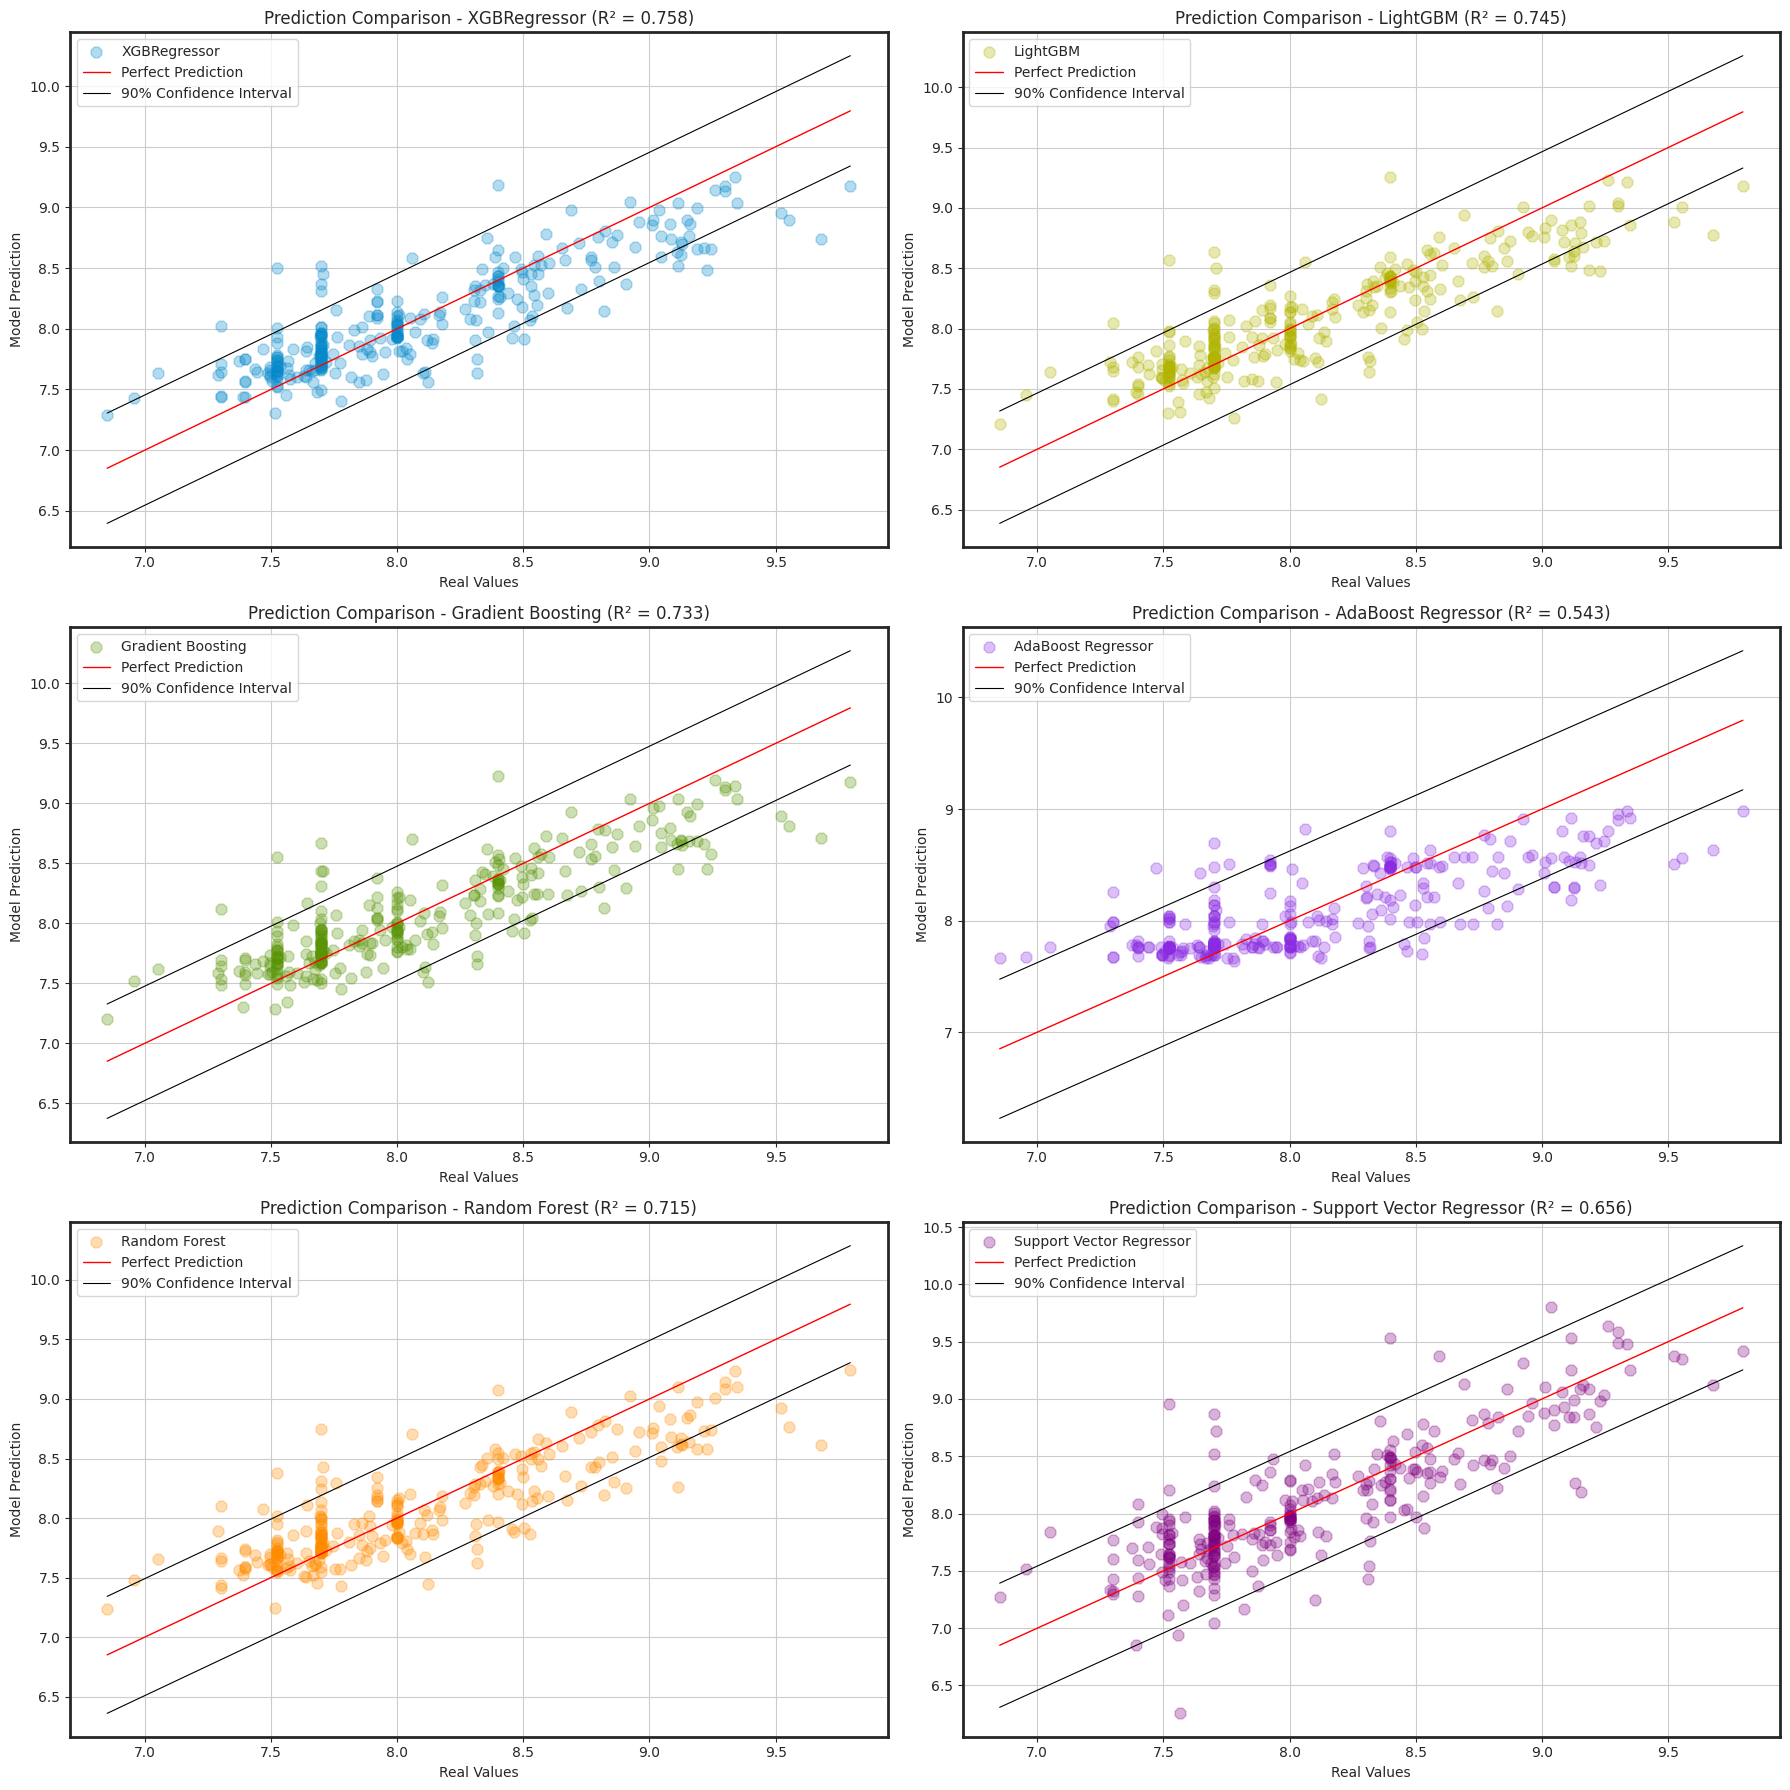

In [27]:
colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

# Configura el gráfico
plt.figure(figsize=(18, 18))

for i, row in result_models_test_df.iterrows():
    # Calcula residuos y desviación estándar para el modelo actual
    residuals = y_test - y_predict_test[i]
    std_residuals = np.std(residuals)

    # Define z-score para intervalo de confianza del 90%
    z = stats.norm.ppf(0.95)
    ci_offset = z * std_residuals

    # Dibuja el scatter plot y la línea de predicción perfecta
    plt.subplot(3, 2, i + 1)  # Ajusta el diseño de subgráficos según sea necesario
    plt.scatter(y_test, y_predict_test[i], color=colors[i], label=row['model'], alpha=0.3, s=70, marker="8")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=1, label='Perfect Prediction')

    # Dibuja el intervalo de confianza usando la desviación estándar calculada
    plt.plot([y_test.min(), y_test.max()], [y_test.min() + ci_offset, y_test.max() + ci_offset], color='black', lw=0.8, linestyle='-', label='90% Confidence Interval')
    plt.plot([y_test.min(), y_test.max()], [y_test.min() - ci_offset, y_test.max() - ci_offset], color='black', lw=0.8, linestyle='-')

    plt.xlabel('Real Values')
    plt.ylabel('Model Prediction')
    plt.title(f'Prediction Comparison - {row["model"]} (R² = {row["R²"]:.3f})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Comparacion_de_test_con_intervalo 2.jpg", bbox_inches='tight')
plt.show()

## Separación de Predicciones por Modelos para Graficos Rec AUC

In [37]:
y_pred_xgb = y_predict_test[0]
y_pred_lgb = y_predict_test[1]
y_pred_gtb = y_predict_test[2]
y_pred_ada = y_predict_test[3]
y_pred_rft = y_predict_test[4]
y_pred_svr = y_predict_test[5]

### Grafico Rec-AUC XgboostRegressor

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.758000,0.759000,0.202000,0.076000,0.001000,0.025000,0.972000,0.034000,1.000000


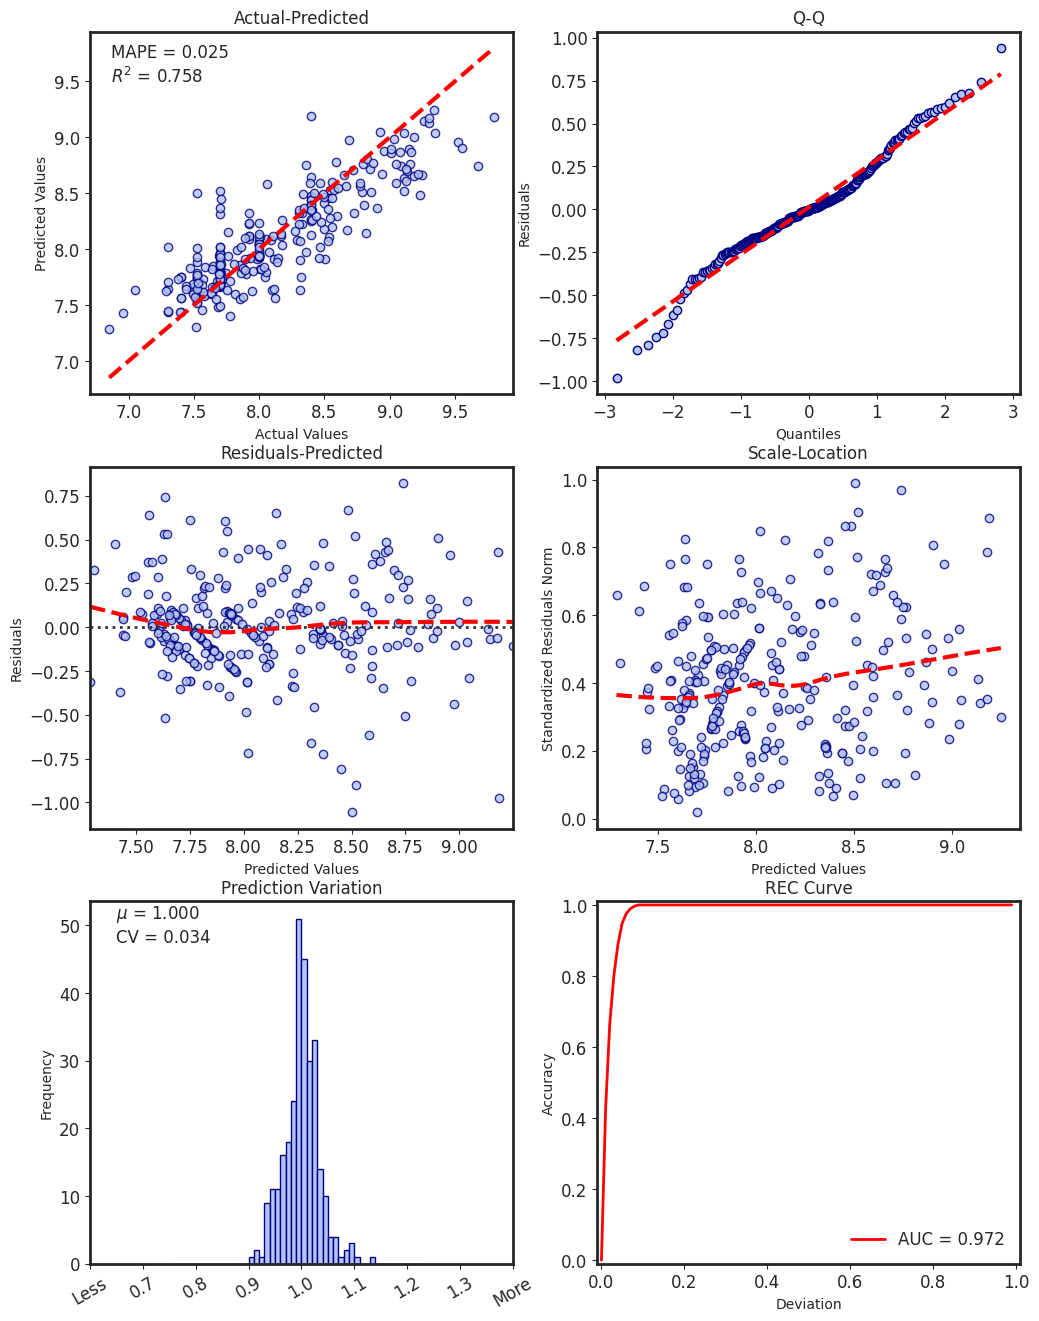

In [38]:
r = RegressionMetrics(y_test, y_pred_xgb)
r.plot()
plt.savefig('Plots figures/grafico_regression_metrics_xgb.png', dpi=300)  

### Grafico Rec-AUC LightGBMRegressor

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.745000,0.746000,0.208000,0.081000,0.001000,0.025000,0.972000,0.035000,0.999000


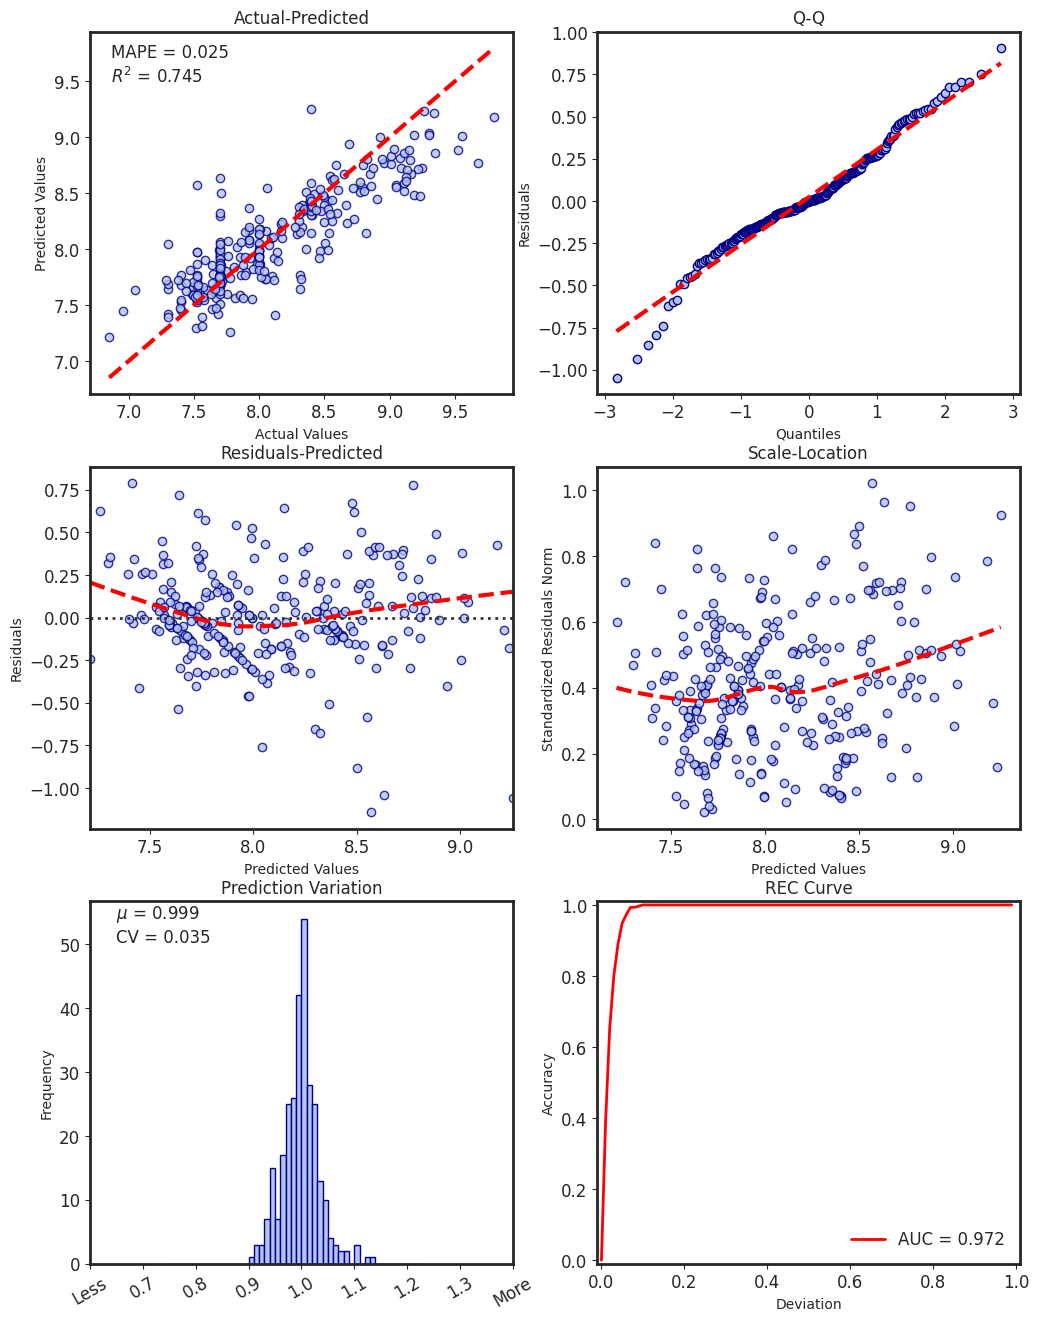

In [39]:
r = RegressionMetrics(y_test, y_pred_lgb)
r.plot()
plt.savefig('Plots figures/grafico_regression_metrics_lgb.png', dpi=300) 

### Grafico Rec-AUC GradientBoostingRegressor

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.733000,0.734000,0.216000,0.084000,0.001000,0.026000,0.971000,0.035000,0.999000


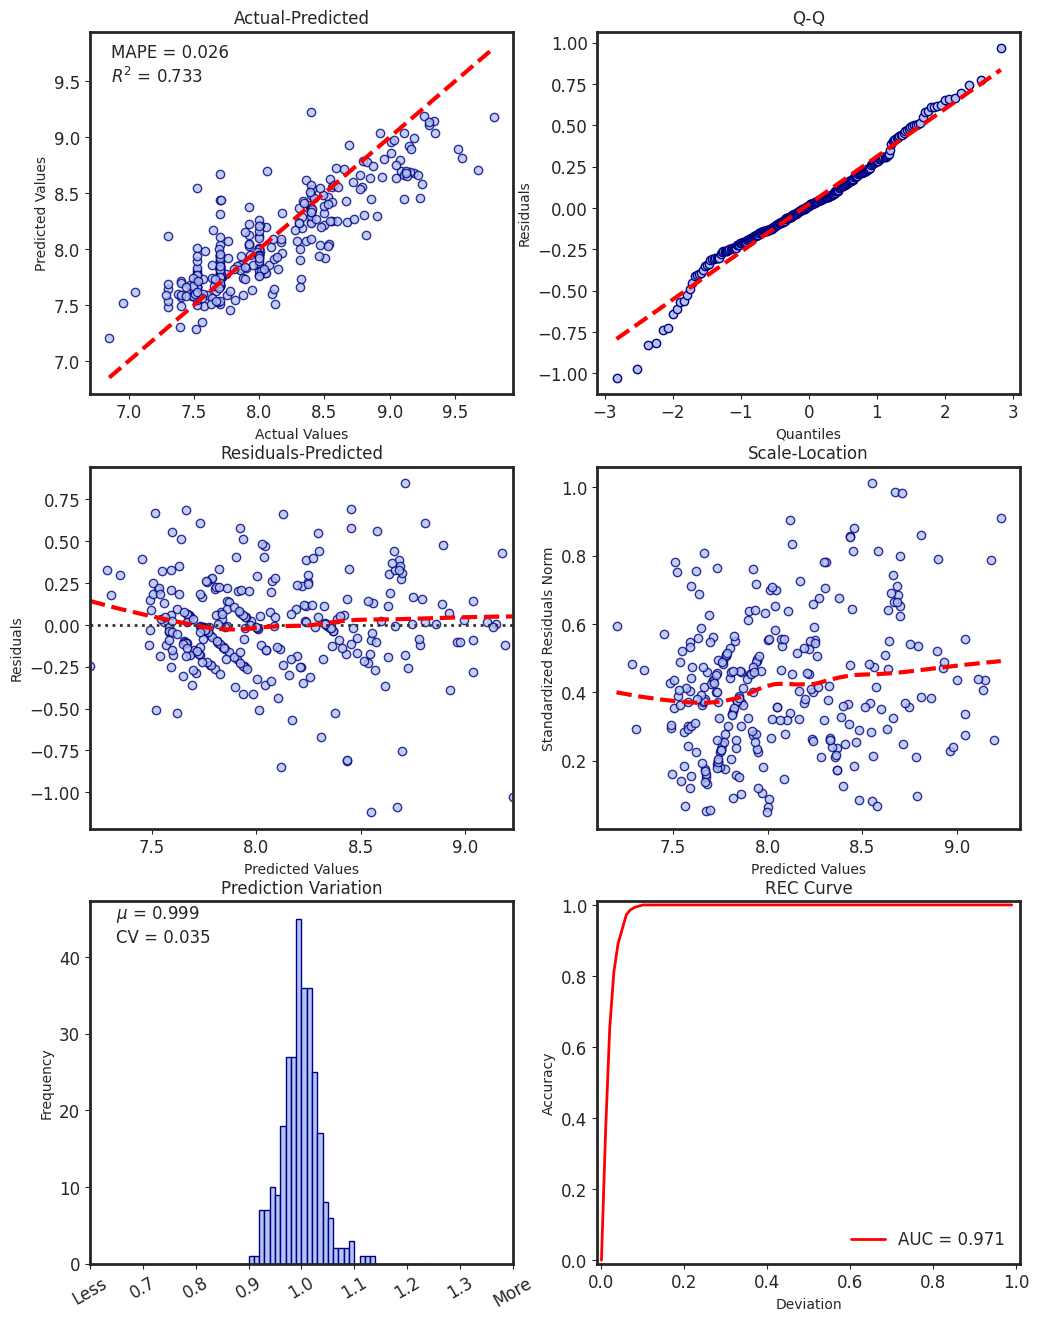

In [40]:
r = RegressionMetrics(y_test, y_pred_gtb)
r.plot()
plt.savefig('Plots figures/grafico_regression_metrics_gbt.png', dpi=300) 

### Grafico Rec-AUC AdaBoostRegressor

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.543000,0.545000,0.292000,0.144000,0.002000,0.036000,0.965000,0.046000,1.000000


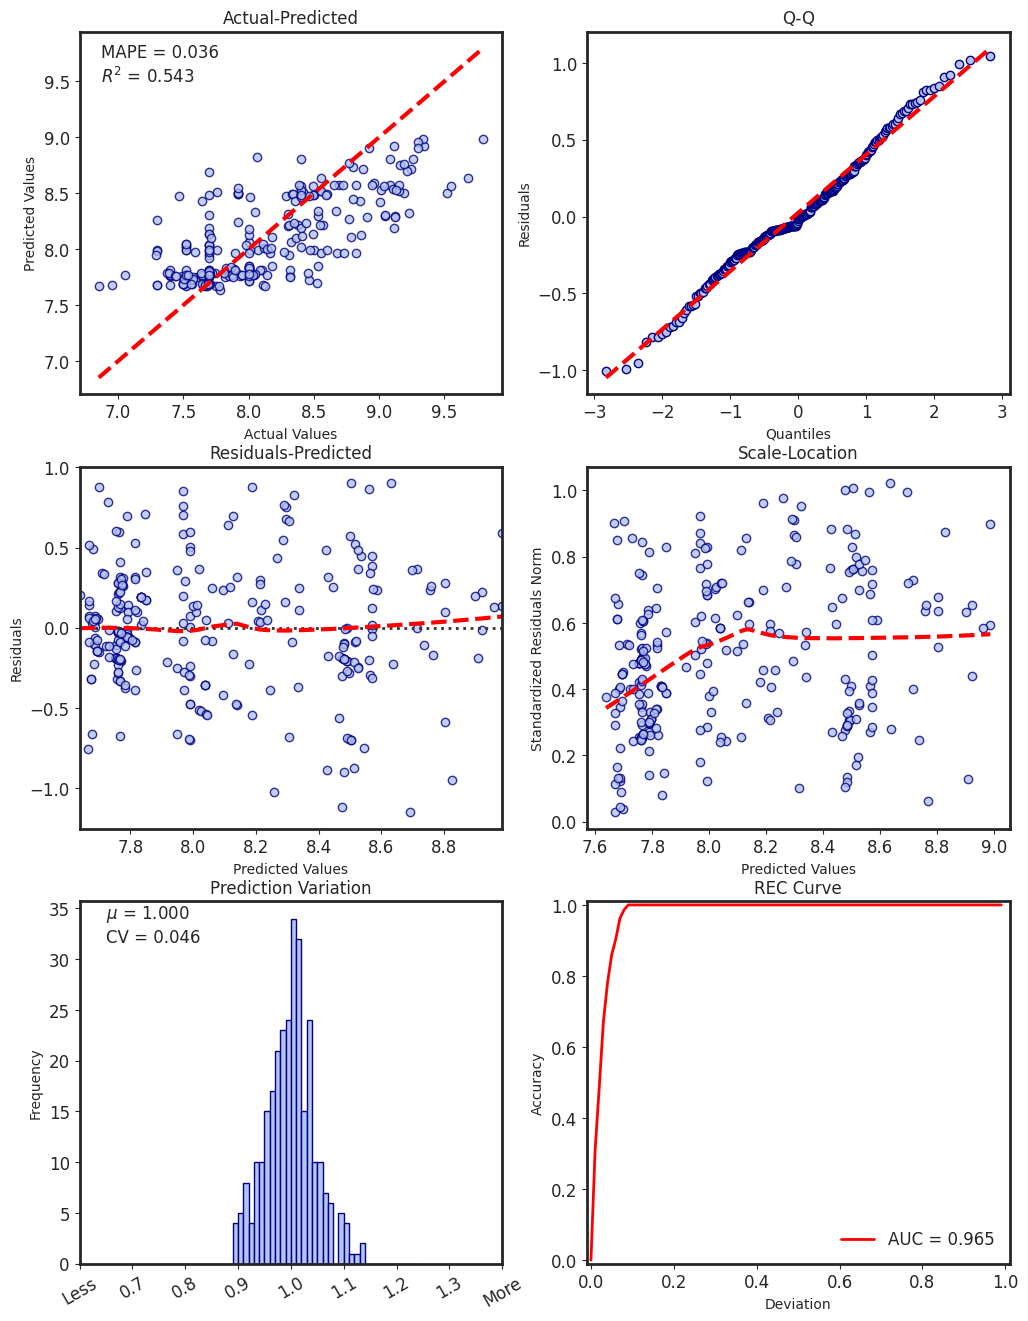

In [41]:
r = RegressionMetrics(y_test, y_pred_ada)
r.plot()
plt.savefig('Plots figures/grafico_regression_metrics_adab.png', dpi=300) 

### Grafico Rec-AUC RandomForestsRegressor

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.715000,0.718000,0.222000,0.090000,0.001000,0.027000,0.971000,0.036000,0.998000


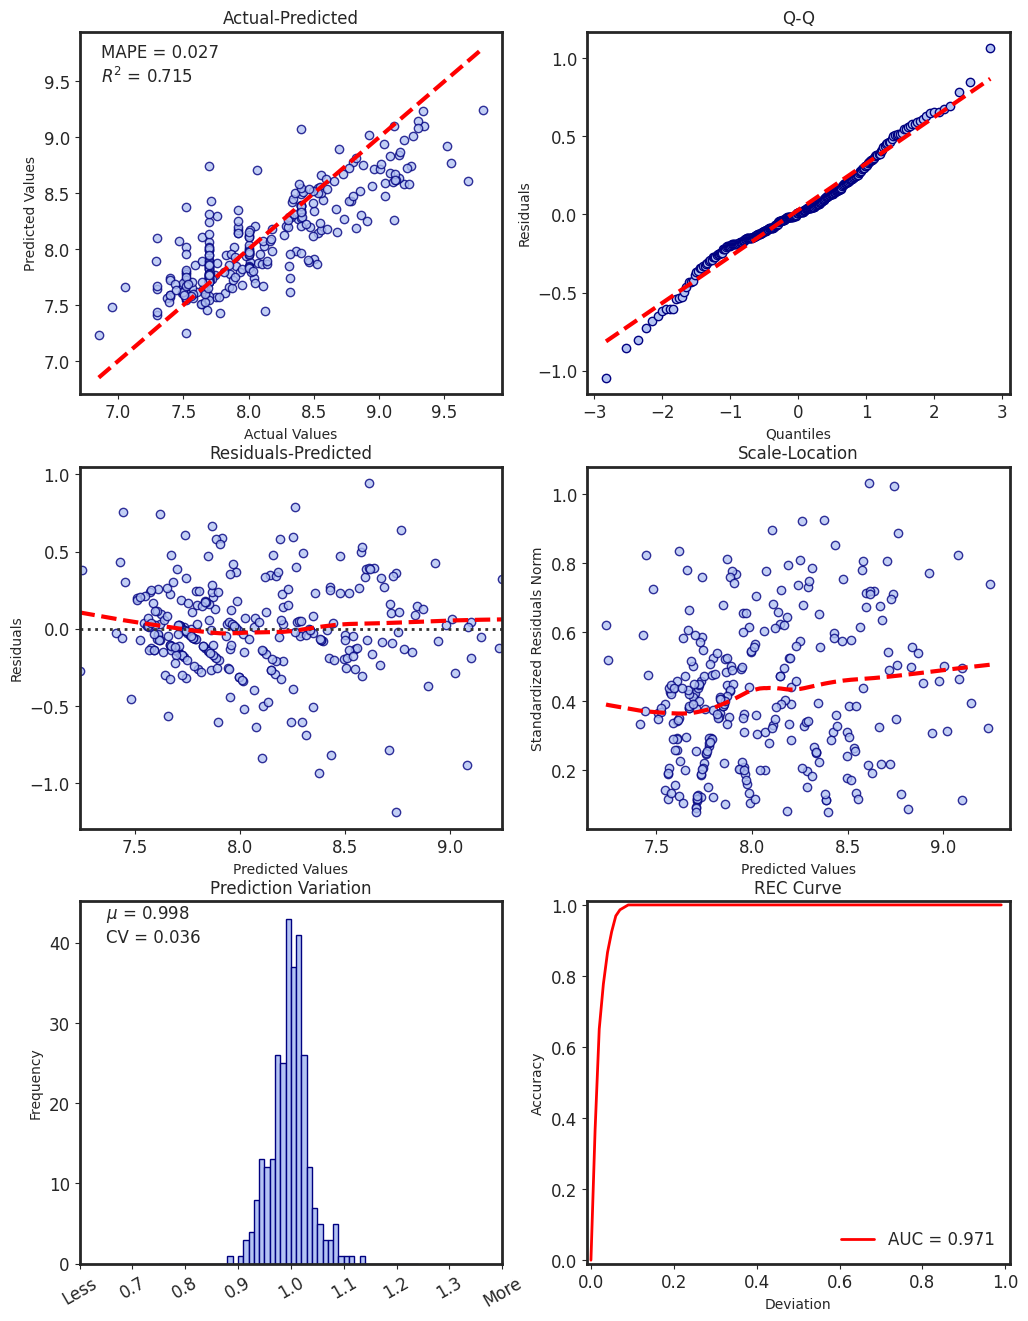

In [42]:
r = RegressionMetrics(y_test, y_pred_rft)
r.plot()
plt.savefig('Plots figures/grafico_regression_metrics_rft.png', dpi=300)

### Grafico Rec-AUC SupportVectorRegressor

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.656000,0.656000,0.236000,0.109000,0.001000,0.029000,0.970000,0.041000,1.000000


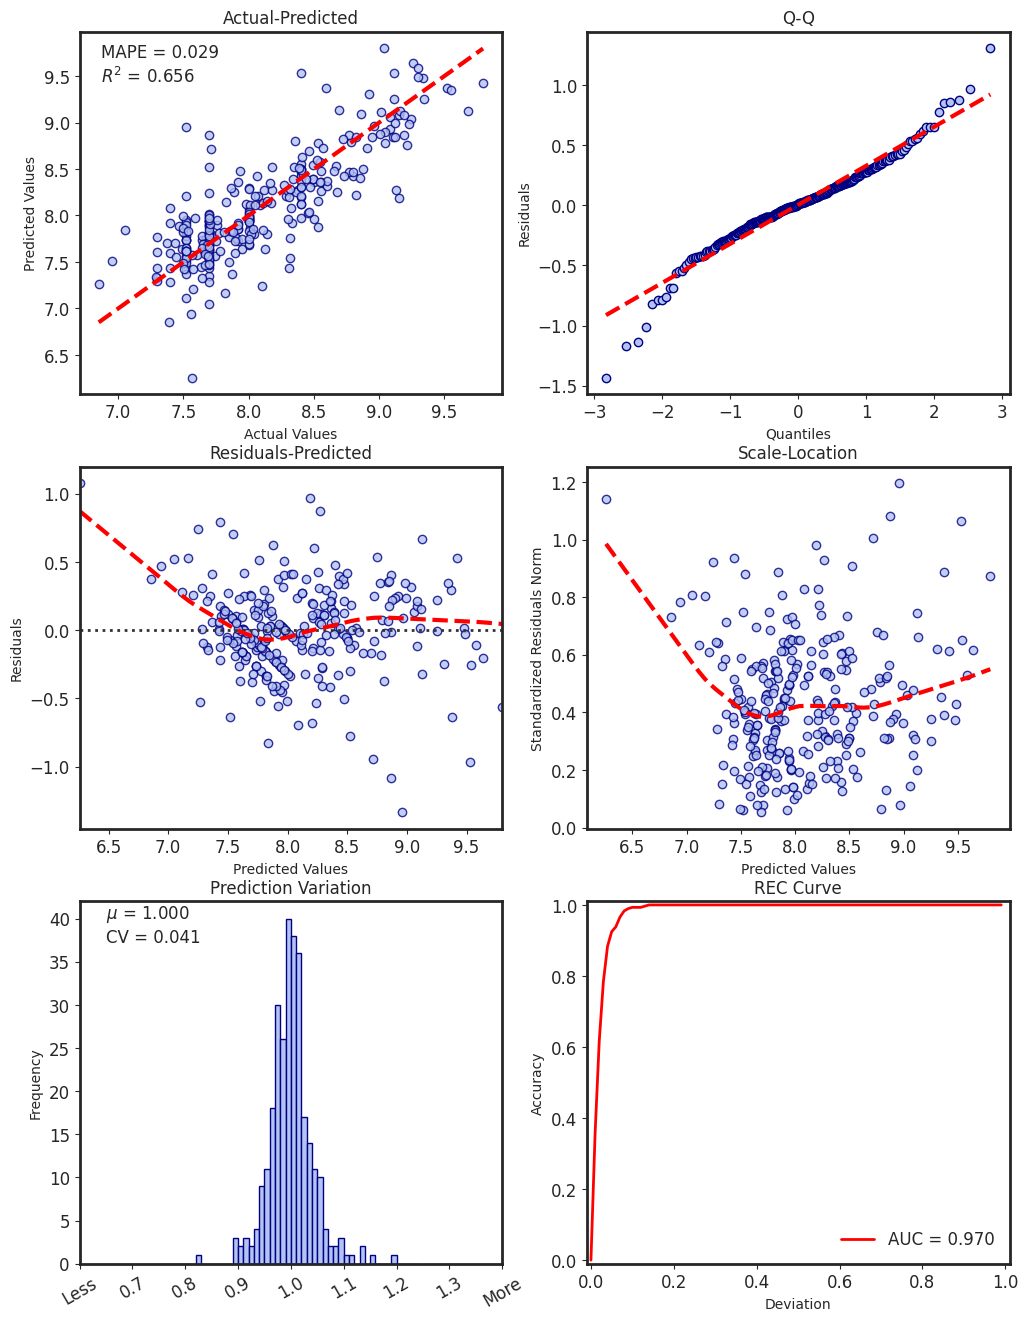

In [43]:
r = RegressionMetrics(y_test, y_pred_svr)
r.plot()
plt.savefig('Plots figures/grafico_regression_metrics_svr.png', dpi=300)